🐊 Problem Statement (Using SVM):
We are solving a binary classification problem using Support Vector Machine (SVM) to classify an animal as either a crocodile or an alligator based on the following features:

🔍 Features:
Size (numerical)

Snout Width (numerical)

🎯 Objective:
To train an SVM model that can learn the optimal decision boundary (hyperplane) separating crocodiles and alligators using these two features.

🧠 SVM Workflow:
Input Data: A dataset containing size and snout width of different animals.

Labeling:

0 → Alligator

1 → Crocodile

Train the SVM to learn the best boundary that maximizes the margin between the two classes.

Predict the class of new animals based on size and snout width.

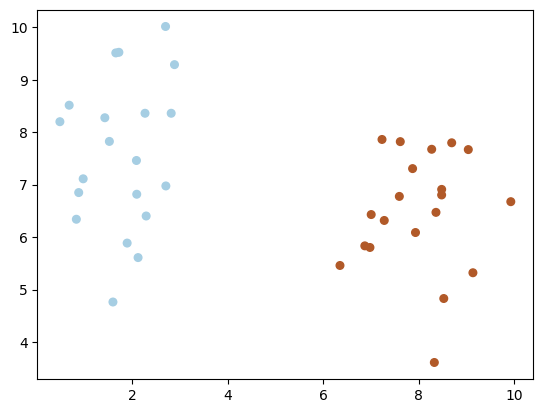

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separate points
X, y = make_blobs(n_samples=40, centers=2, random_state=20)
# fit the model, don't regularize for illustration purposes

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# display the data in graph form
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [2]:
#Using to predict unknown data

newData = [[3,4],[5,6]]
print(clf.predict(newData))

[0 1]


AttributeError: 'SVC' object has no attribute 'support_vector'

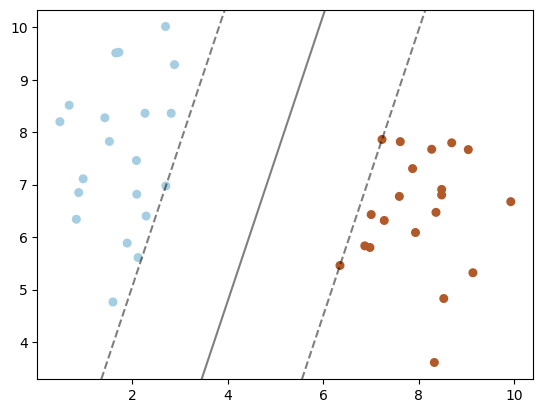

In [3]:
#fit the model dont regularize for illustration

clf = svm.SVC(kernel = 'linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1],c=y , s=30, cmap=plt.cm.Paired)
#plt.show()
#plot the decision function

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grid  to evaluate model

xx=np.linspace(xlim[0], xlim[1], 30)
yy=np.linspace(ylim[0],ylim[1],30)
YY , XX =np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z  = clf.decision_function(xy).reshape(XX.shape)


# plot decision boundary and margin
ax.contour(XX,YY,Z,colors = 'k',levels=[-1,0,1],
           alpha=0.5,
           linestyles=['--','-','--'])

#plot support vectors
ax.scatter(clf.support_vector[:,0],
           clf.support_vector[: ,1],s=100,
           linewidth = 1 ,facecolors = 'none')
plt.show()





1.] import numpy as np: This line imports the NumPy library, which is fundamental for numerical 
operations in Python. You'll often see it aliased as np for brevity. It provides powerful tools
for working with arrays and matrices.

2.]import matplotlib.pyplot as plt: This imports the pyplot module from the Matplotlib library. Matplotlib is a widely used library for creating static, interactive, and animated visualizations in Python. pyplot provides a collection of functions that make it behave like MATLAB's plotting interface. It's aliased as plt

3.]from sklearn import svm: This line imports the svm module from the scikit-learn 
(often abbreviated as sklearn) library. Scikit-learn is a comprehensive machine learning library in Python, offering various algorithms for classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. The svm module specifically provides implementations for Support Vector Machines.

4.]from sklearn.datasets import make_blobs: This imports the make_blobs function from the sklearn.datasets module. This is a utility function that generates synthetic datasets with isotropic Gaussian blobs, useful for creating sample classification problems.

5.]X, y = make_blobs(n_samples=40, centers=2, random_state=20): This is where you generate your dataset.

n_samples=40: Specifies that you want to create a total of 40 data points.
centers=2: Indicates that these 40 data points should be clustered around 2 different centers (meaning you'll have two distinct groups or classes).
random_state=20: This is a crucial parameter for reproducibility. Setting a random_state ensures that the data points are generated in the same way every time you run this code. Without it, the generated data would be different on each execution

6.]The function returns two values:

X: This is a NumPy array containing the features of your data points. Since make_blobs by default creates 2-dimensional data, X will be a 40x2 array (40 samples, each with 2 features).

y: This is a NumPy array containing the class labels for each data point. Since you specified centers=2, y will be a 1-dimensional array of length 40, with each element being either 0 or 1, indicating which of the two clusters the corresponding data point belongs to.

7.]clf = svm.SVC(kernel='linear', C=1): Here, you are creating an instance of the Support Vector Classifier (SVC).

svm.SVC(): This is the constructor for the SVC class.

kernel='linear': This specifies the kernel type to be used in the algorithm. A linear kernel means that the decision boundary separating the two classes will be a straight line in this 2D space. SVMs can also use non-linear kernels to handle more complex data distributions.

C=1: This is a regularization parameter. C controls the trade-off between achieving a low training error and a low testing error (generalization ability).

A small C makes the decision boundary smoother and can tolerate more misclassifications on the training data (prioritizing generalization).
A large C tries to classify all training examples correctly, potentially leading to a more complex decision boundary that might not generalize well to unseen data.
In your comment # fit the model, don't regularize for illustration purposes, you've set C=1, which applies some regularization, though perhaps not as strongly as a very small value.

8.]clf.fit(X, y): This is the crucial step where the SVM model learns from your data.
fit() is a method of the SVC object.
It takes your feature data X and the corresponding class labels y as input.
During the fitting process, the SVM algorithm finds the optimal hyperplane (a line in 2D) that best separates the two classes in your data, maximizing the margin between the closest points of each class (the support vectors).

9.]plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired): This line uses Matplotlib to create a scatter plot of your data points.
X[:, 0]: This selects all rows (:) and the first column (0) of your X array, which represents the x-coordinates of your data points.
X[:, 1]: This selects all rows and the second column (1) of X, representing the y-coordinates.
c=y: This uses the class labels in the y array to color the data points. Points belonging to one class will have one color, and points from the other class will have a different color.
s=30: This sets the size (area) of each marker in the scatter plot to 30.
cmap=plt.cm.Paired: This specifies the colormap to be used for coloring the points. plt.cm.Paired is a colormap that typically assigns distinct colors to different classes.
plt.show(): This function displays the generated plot. Your comment #Using to predict unknown data is a bit out of place here. plt.show() simply displays the visualization of the training data. The prediction of new data happens in the next part.


10.]newData = [[3,4],[5,6]]: Here, you are creating a new list of data points that you want to classify using your trained SVM model. Each inner list represents a single data point with its features (in this case, two features). So, [3, 4] is one data point, and [5, 6] is another.
print(clf.predict(newData)): This is where the prediction happens.
clf.predict(): This is a method of your trained SVC object (clf) that takes new data as input and returns the predicted class labels for that data.
newData: You are passing the newData list (which will be automatically converted to a NumPy array by predict()) to the predict() method.
The output of clf.predict(newData) will be a NumPy array containing the predicted class labels (either 0 or 1 in this case) for each of the data points in newData.


11.]clf = svm.SVC(kernel = 'linear', C=1000): You've increased the value of C significantly, from 1 to 1000.
Impact of higher C: A larger C tells the SVM to heavily penalize misclassified points. It tries harder to create a decision boundary that correctly classifies all (or as many as possible) training examples. This can lead to a more complex and potentially less generalizable model if the data has noise or outliers. Your comment #fit the model dont regularize for illustration is interesting because a very large C actually reduces regularization. Smaller C values impose stronger regularization. Perhaps you meant to illustrate the effect of trying to perfectly fit the training data?
#plt.show(): You've commented out the initial plt.show(), which means the scatter plot of the data points won't be displayed on its own anymore. It will be part of the subsequent plot with the decision boundary


12.]ax = plt.gca(): This gets the current Axes instance (the plotting area) from the current figure. You'll use this ax object to add more elements to your plot.
xlim = ax.get_xlim(): This retrieves the current x-axis limits of the plot.
ylim = ax.get_ylim(): This retrieves the current y-axis limits of the plot. You're capturing these limits to define the range over which you'll evaluate the decision function.